Hola **Adriana**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto sprint 10   

El proyecto consiste en predecir si un cliente abadonara el banco, se trabaja con datos de clientes que continuan o han abandonado sus cuentas. Se tratan los datos, se corrige el desequilibrio de clases y se evaluan distintos modelos para deciri el de mejor resultado. Se persigue un valor de 0.59 de F1.

In [27]:
#impotar librerias que se usaran
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [28]:
#Cargar dataset
data = pd.read_csv("/datasets/Churn.csv")                

In [3]:
#Imprimir primeras filas para conocer un poco de los datos
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
#imprimimos la informacion del dataset para conocer las columnas y el tipo de datos
# se observa que existen 3 columnas con tipo de datos de cadena, 
#el CustummerID no es relevante para el modelo, asi como el Surname.
#Tambien observamos que hay datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#Analisamos si hay datos faltantes 
print('Tenure', data['Tenure'].isna().sum())

Tenure 909


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial de los datos y la carga de lo necesario para trabajarlos
</div>

In [6]:
#Rellanamos los datos faltantes con la mediana
data['Tenure']= data['Tenure'].fillna(data['Tenure'].median())

#eliminamos las columnas que no son importantes para el modelo
data=data.drop('RowNumber', axis=1)
data=data.drop('CustomerId', axis=1)
data=data.drop('Surname', axis=1)

In [7]:
#convertir de columnas categoricas a numericas y lo corroboramos imprimiendolas
encoder = OrdinalEncoder()
data_ready= pd.DataFrame(encoder.fit_transform(data), columns=data.columns)
print(data_ready.head())

   CreditScore  Geography  Gender   Age  Tenure  Balance  NumOfProducts  \
0        228.0        0.0     0.0  24.0     2.0      0.0            0.0   
1        217.0        2.0     0.0  23.0     1.0    743.0            0.0   
2        111.0        0.0     0.0  24.0     8.0   5793.0            2.0   
3        308.0        0.0     0.0  21.0     1.0      0.0            1.0   
4        459.0        2.0     0.0  25.0     2.0   3696.0            0.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             1.0           5068.0     1.0  
1        0.0             1.0           5639.0     0.0  
2        1.0             0.0           5707.0     1.0  
3        0.0             0.0           4704.0     0.0  
4        1.0             1.0           3925.0     0.0  


In [8]:
# Escalado de caracteristicas
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember']
scaler = StandardScaler()
scaler.fit(data_ready[numeric])
data_ready[numeric] = scaler.transform(data_ready[numeric])
print(data_ready.head())

   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.327331        0.0     0.0  0.293793 -1.086246 -0.958432   
1    -0.441331        2.0     0.0  0.198387 -1.448581 -0.608805   
2    -1.539876        0.0     0.0  0.293793  1.087768  1.767524   
3     0.501759        0.0     0.0  0.007575 -1.448581 -0.958432   
4     2.066668        2.0     0.0  0.389199 -1.086246  0.780759   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      -0.911583   0.646092        0.970243           5068.0     1.0  
1      -0.911583  -1.547768        0.970243           5639.0     0.0  
2       2.527057   0.646092       -1.030670           5707.0     1.0  
3       0.807737  -1.547768       -1.030670           4704.0     0.0  
4      -0.911583   0.646092        0.970243           3925.0     0.0  


In [9]:
# segmentación en datos de entrenamiento, validacion y prueba
# Si shuffle=False, el conjunto de datos no mezclará antes del particionado de esta forma evitamos que la 
#segmentacion del conjunto de datos sea de manera aleatoria cada vez que se ejecuta el script.
#primera segmentación
train_valid, test = train_test_split(data_ready, test_size=0.4, random_state=42, shuffle=False)
#segunda segmentación
train, valid = train_test_split(train_valid, test_size=0.5, random_state=42, shuffle=False)
#Comprobamos tamaño de conjuntos
print(train.shape)
print(valid.shape)
print(test.shape)
print(data_ready.shape)

(3000, 11)
(3000, 11)
(4000, 11)
(10000, 11)


In [10]:
#eliminamos la columna objetivo "Exited" del dataframe completo
# y asignamos la columna  "Exited" a  target
target_train = train['Exited']
features_train = train.drop('Exited', axis=1)
target_valid = valid['Exited']
features_valid = valid.drop('Exited', axis=1)
target_test = test['Exited']
features_test = test.drop('Exited', axis=1)

0.0    0.7963
1.0    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

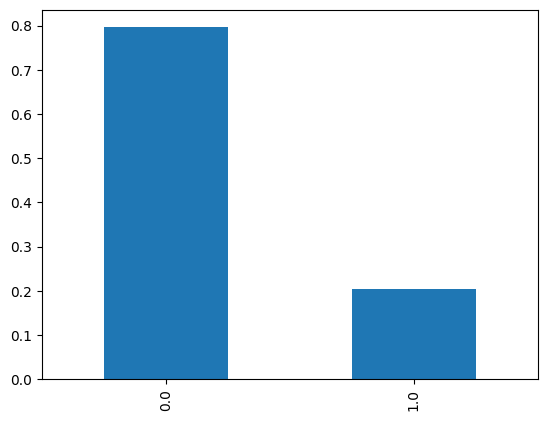

In [11]:
# Evaluamos el equilibrio de clases
target= data_ready['Exited']
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre es importante en este tipo de problemas de machine learning (los de clasificación) entender la distribución de las clases para saber si hay que aplicar alguna técnica de balanceo
</div>

# Primera prueba con el algoritmo RandomForestClassifier sin tener en cuenta el desequilibrio de clases
Entrenamiento del modelo con datos de entrenamiento y evaluación del modelo con datos de validación, se dejan los valores de prueba hasta determinar el mejor modelo.  Se utiliza un rango de arboles de 3 a 20 y se evalua cuantos arboles son necesarios para la mejor exactitud.

In [12]:
best_f1 = 0
best_est = 0
for arboles in range(10,201, 10):
    for ramas in range(1, 100,4): # selecciona el rango del hiperparámetro
        model_pre = RandomForestClassifier(random_state=54321, n_estimators=arboles, max_depth=ramas) # configura el número de árboles
        model_pre.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento

    # Evaluación del modelo
        y_pred= model_pre.predict(features_valid) # calcula la puntuación de accuracy en el conjunto de validación
        print("F1 de n_estimator igual a", arboles, ramas)
        f1_pre = f1_score(target_valid, y_pred)
        print("Conjunto de entrenamiento:", f1_pre)
    
        if f1_pre > best_f1:
            best_f1 = f1_pre# guarda la mejor puntuación de accuracy en el conjunto de validación
            best_est = arboles # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud

print("La F1 del mejor modelo en el conjunto de validación (n_estimators = {}): (ramas= {}): {}".format(best_est,ramas, best_f1, ))
#print(f1_score(target_valid, best_score))

F1 de n_estimator igual a 10 1
Conjunto de entrenamiento: 0.0
F1 de n_estimator igual a 10 5
Conjunto de entrenamiento: 0.5055679287305123
F1 de n_estimator igual a 10 9
Conjunto de entrenamiento: 0.5471311475409836
F1 de n_estimator igual a 10 13
Conjunto de entrenamiento: 0.53125
F1 de n_estimator igual a 10 17
Conjunto de entrenamiento: 0.49486652977412726
F1 de n_estimator igual a 10 21
Conjunto de entrenamiento: 0.5348133198789101
F1 de n_estimator igual a 10 25
Conjunto de entrenamiento: 0.5248226950354611
F1 de n_estimator igual a 10 29
Conjunto de entrenamiento: 0.5243902439024392
F1 de n_estimator igual a 10 33
Conjunto de entrenamiento: 0.5243902439024392
F1 de n_estimator igual a 10 37
Conjunto de entrenamiento: 0.5243902439024392
F1 de n_estimator igual a 10 41
Conjunto de entrenamiento: 0.5243902439024392
F1 de n_estimator igual a 10 45
Conjunto de entrenamiento: 0.5243902439024392
F1 de n_estimator igual a 10 49
Conjunto de entrenamiento: 0.5243902439024392
F1 de n_estima

F1 de n_estimator igual a 50 29
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 33
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 37
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 41
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 45
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 49
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 53
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 57
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 61
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 65
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 69
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 73
Conjunto de entrenamiento: 0.5494949494949495
F1 de n_estimator igual a 50 77
Conjunto de entrenamiento: 0.549

F1 de n_estimator igual a 90 53
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 57
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 61
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 65
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 69
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 73
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 77
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 81
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 85
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 89
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 93
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 90 97
Conjunto de entrenamiento: 0.5553319919517102
F1 de n_estimator igual a 100 1
Conjunto de entrenamiento: 0.0
F

F1 de n_estimator igual a 130 73
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 130 77
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 130 81
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 130 85
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 130 89
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 130 93
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 130 97
Conjunto de entrenamiento: 0.5593561368209256
F1 de n_estimator igual a 140 1
Conjunto de entrenamiento: 0.0
F1 de n_estimator igual a 140 5
Conjunto de entrenamiento: 0.5039018952062431
F1 de n_estimator igual a 140 9
Conjunto de entrenamiento: 0.5421940928270043
F1 de n_estimator igual a 140 13
Conjunto de entrenamiento: 0.5519348268839105
F1 de n_estimator igual a 140 17
Conjunto de entrenamiento: 0.551307847082495
F1 de n_estimator igual a 140 21
Conjunto de entrenamiento: 0.561368209

F1 de n_estimator igual a 170 93
Conjunto de entrenamiento: 0.5602409638554217
F1 de n_estimator igual a 170 97
Conjunto de entrenamiento: 0.5602409638554217
F1 de n_estimator igual a 180 1
Conjunto de entrenamiento: 0.0
F1 de n_estimator igual a 180 5
Conjunto de entrenamiento: 0.5061043285238623
F1 de n_estimator igual a 180 9
Conjunto de entrenamiento: 0.5443037974683544
F1 de n_estimator igual a 180 13
Conjunto de entrenamiento: 0.5560081466395113
F1 de n_estimator igual a 180 17
Conjunto de entrenamiento: 0.557013118062563
F1 de n_estimator igual a 180 21
Conjunto de entrenamiento: 0.566
F1 de n_estimator igual a 180 25
Conjunto de entrenamiento: 0.5599194360523666
F1 de n_estimator igual a 180 29
Conjunto de entrenamiento: 0.5608040201005025
F1 de n_estimator igual a 180 33
Conjunto de entrenamiento: 0.5608040201005025
F1 de n_estimator igual a 180 37
Conjunto de entrenamiento: 0.5608040201005025
F1 de n_estimator igual a 180 41
Conjunto de entrenamiento: 0.5608040201005025
F1 de

In [13]:
#Corremos el modelo con el mejor n_estimator y calculamos el valor f1
model_pre = RandomForestClassifier(random_state=54321, n_estimators=13 ) # configura el número de árboles
model_pre.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
valid_predictions = model_pre.predict(features_valid)
print(f1_score(target_valid, valid_predictions)) 

0.5513928914505283


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien analizado este caso, el modelo logra predecir ciertos casos bien para la clase minoritaria pero aún no la logra generealizar del todo, aquí es donde entran los ajustes y las diferentes técnicas para el balanceo
</div>

0.0    0.794333
1.0    0.205667
Name: Exited, dtype: float64


<AxesSubplot:>

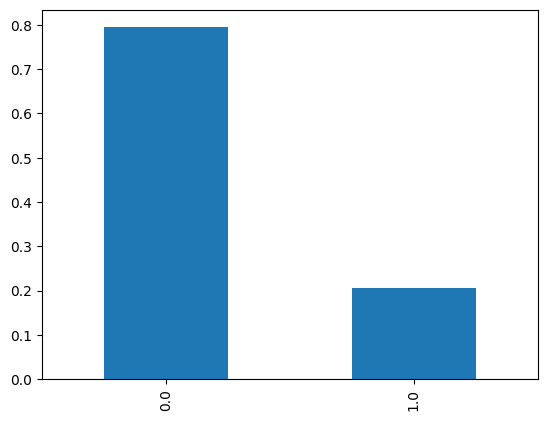

In [14]:
# Evaluamos el equilibrio de clases de los datos de validacion 
class_frequency_pre= target_valid.value_counts(normalize=True)
print(class_frequency_pre)
class_frequency_pre.plot(kind='bar')

Aunque la proporción de predicciones correctas es cercana al 100 %, todavía no sabemos si el cliente dejará el banco o no. Hay un fuerte desequilibrio de clases en nuestro problema, lo que afecta cómo se entrena el modelo.

# Correccion de desequilibrio de clases 

Dominar las técnicas de ajuste de peso de clase (sobremuestreo y submuestreo) mejoran la calidad del modelo en un escenario de desequilibrio de clases.
Ajustar las métricas de clasificación considerando las probabilidades de clase.

## SOBREMUESTREO repetir los valores

In [15]:
# Sobremuestreo para repetir valores
from sklearn.utils import shuffle
target= data_ready['Exited']
features= data_ready.drop('Exited', axis=1)

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [30]:
#utilizamos la funcion creada para sobremuestrear y tener nuevos conjuntos
#features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, 4)
features_upsampled, target_upsampled = upsample(features_valid, target_valid, 10)

In [17]:
features_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8553 entries, 4446 to 4643
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8553 non-null   float64
 1   Geography        8553 non-null   float64
 2   Gender           8553 non-null   float64
 3   Age              8553 non-null   float64
 4   Tenure           8553 non-null   float64
 5   Balance          8553 non-null   float64
 6   NumOfProducts    8553 non-null   float64
 7   HasCrCard        8553 non-null   float64
 8   IsActiveMember   8553 non-null   float64
 9   EstimatedSalary  8553 non-null   float64
dtypes: float64(10)
memory usage: 735.0 KB


## SUBMUESTREO para reduccion fraccion de una clase

In [18]:
#Submuestreo para reducir las observaciones de la clase predominante.
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones] )
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones] )

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [19]:
features_downsampled, target_downsampled = downsample(features_upsampled, target_upsampled, 0.1)
features_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6408 entries, 4612 to 5750
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6408 non-null   float64
 1   Geography        6408 non-null   float64
 2   Gender           6408 non-null   float64
 3   Age              6408 non-null   float64
 4   Tenure           6408 non-null   float64
 5   Balance          6408 non-null   float64
 6   NumOfProducts    6408 non-null   float64
 7   HasCrCard        6408 non-null   float64
 8   IsActiveMember   6408 non-null   float64
 9   EstimatedSalary  6408 non-null   float64
dtypes: float64(10)
memory usage: 550.7 KB


Ademas del sobremuestreo y submuestreo, podemos especificar class_weight='balanced', el algoritmo calculará cuántas veces la clase "0" ocurre con más frecuencia que la clase "1". Denotaremos este número como N (un número desconocido de veces). Los nuevos pesos de clase se ven así:

class "0" weight = 1.0

class "1" weight = N

La clase rara tendrá un mayor peso

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Utilizar sobremuestreo o submuestreo o el balanceo de clases en los parámetros del modelo puede ayudar a los modelos a "entender" cómo hacer las predicciones, también te puedes apoyar de los parámetros de los modelos para mejorar estos resultados
</div>

# Pruebas de validacion en modelos

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En esta parte inicialmente corri los modelos con el ultimo ajuste de submuestro, sin embargo los valores de F1 son menores a si corro el modelo con los valores de sobremuestreo, por lo cual los deje con los de sobremuestreo. Lo que me hace dudar sobre si la correccion de clases la hice de manera adecuada, una despues de la otra. Y no logro llegar al valor pedido de F1 de 0.59, lo maximo que logro es 0.56, en esta parte si necesito orientación. 
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Efectivamente no se logra llegar a la métrica solicitada, aquí lo que te recomiendo es iterar sobre los parámetros de los modelos utilizados, en la parte del for loop que tienes no estás usando los datos sobre muestreados sino los originales por lo que no verás un cambio, deberías aplicar el mismo proceso para los datos sobre muestreados y no importa que para los modelos submuestreados no logres llegar a la métrica objetivo ya que los notebooks son para dejar constancia de tu proceso de experimentación.
    
También debes arreglar la parte del accuracy que estás intentando calcular ya que no se ha importad el módulo y para este tipo de modelos no es recomendable usar esa métrica ya que por la forma en la que se calcula siempre dará un valor alto por que tienes predicciones para la clase mayoritaria.
</div>

## Regresion logaritmica 

In [20]:
#Modelo de regresion logaritmica ya con equilibrio de clases
model_rl= LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model_rl.fit(features_upsampled, target_upsampled)
predicted_valid_rl= model_rl.predict(features_valid)

print('valor de F1:', f1_score(target_valid, predicted_valid_rl))

valor de F1: 0.4991472427515634


## Arbol de decision 

In [21]:
best_depth=0
best_score=0
for depth in range(1, 11):  # selecciona el rango del hiperparámetro
    model_deci_tree= DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_deci_tree.fit(features_upsampled, target_upsampled)
    # <crea un modelo, especifica random_state=54321 y max_depth=depth >
    # < entrena el modelo >
    train_predictions = model_deci_tree.predict(features_upsampled) # < predicciones obtenidas con el conjunto de entrenamiento >
    valid_predictions = model_deci_tree.predict(features_valid)
    #test_predictions = model.predict(features_test) # < predicciones obtenidas con el conjunto de prueba> 
    #SE UTILIZA HASTA HABER DETERMINADO UN MODELO, despues usar el max_depth que haya salido
    print("Exactitud de max_depth igual a", depth)
    f1_train= f1_score(target_upsampled, train_predictions)
    print("Conjunto de entrenamiento:", f1_train)

    f1_valid= f1_score(target_valid,  valid_predictions) 
    print("Conjunto de Validación:", f1_valid)

    print()
    if f1_valid > best_score:
        best_score = f1_valid# guarda la mejor puntuación de accuracy en el conjunto de validación
        best_depth = depth # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
    print("La F1 del mejor modelo en el conjunto de validación (depth= {}): {}".format(best_depth, best_score))
    

Exactitud de max_depth igual a 1
Conjunto de entrenamiento: 0.7255369928400955
Conjunto de Validación: 0.5059920106524634

La F1 del mejor modelo en el conjunto de validación (depth= 1): 0.5059920106524634
Exactitud de max_depth igual a 2
Conjunto de entrenamiento: 0.7610406443847791
Conjunto de Validación: 0.5306649451258877

La F1 del mejor modelo en el conjunto de validación (depth= 2): 0.5306649451258877
Exactitud de max_depth igual a 3
Conjunto de entrenamiento: 0.7586854460093897
Conjunto de Validación: 0.5530458590006845

La F1 del mejor modelo en el conjunto de validación (depth= 3): 0.5530458590006845
Exactitud de max_depth igual a 4
Conjunto de entrenamiento: 0.838623454727698
Conjunto de Validación: 0.5281430825881116

La F1 del mejor modelo en el conjunto de validación (depth= 3): 0.5530458590006845
Exactitud de max_depth igual a 5
Conjunto de entrenamiento: 0.8274663189917427
Conjunto de Validación: 0.5707434052757794

La F1 del mejor modelo en el conjunto de validación (d

In [22]:
#Modelo de arbol de desicion ya con equilibrio de clases
model_ad = DecisionTreeClassifier(max_depth=7, random_state=12345, class_weight='balanced')
model_ad.fit(features_upsampled, target_upsampled)
predicted_valid_ad= model_ad.predict(features_valid)
print('Valor de F1:', f1_score(target_valid, predicted_valid_ad))

Valor de F1: 0.6300884955752212


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente, con este modelo se logró superar la métrica objetivo con el balance de las clases
</div>

## Bosques aleatorios

In [23]:
##Modelo de bosques aleatorios ya con equilibrio de clases
model_ba = RandomForestClassifier(random_state=12345, n_estimators=100,  max_depth=97, class_weight='balanced') # configura el número de árboles
model_ba.fit(features_upsampled, target_upsampled) # entrena el modelo en el conjunto de entrenamiento
valid_predictions_ba = model_ba.predict(features_valid)
print(' Valor de F1:', f1_score(target_valid, valid_predictions_ba)) 

 Valor de F1: 1.0


# Ensayar con el conjunto de prueba

In [33]:
##Modelo de bosques aleatorios ya con equilibrio de clases
model_final = RandomForestClassifier(random_state=54321, n_estimators=130, max_depth=97, class_weight='balanced') # configura el número de árboles
model_final.fit(features_upsampled, target_upsampled) # entrena el modelo en el conjunto de entrenamiento
test_predictions_ba = model_final.predict(features_test)
print('F1:', f1_score(target_test, test_predictions_ba)) 

probabilities_test = model_final.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc= roc_auc_score(target_test, probabilities_one_test)
print('AUC_ROC:',auc_roc)

F1: 0.5754583921015516
AUC_ROC: 0.8399282749966812


Se escoge el modelo de bosques aleatorios ya que en el conjunto de validacion dio un valor el mayor valor de F1, siendo de 0.56. 

En el testeo del modelo, eEl valor de AUC_ROC tiende a 1 lo cual nos dice que es un modelo de cálidad, sin embargo el F1 no alcanza el valor pedido de 0.59, llegando solo hasta 0.55

al correr los modelos anteriores se logra un F1 de 0.49 para regresion logistica, mientras que para arbol de decision es de 0.63, llegando hasta 1.0 en bosque aleatorio. Al correr el modelo de bosque aleatorio en un ciclo for para varios n_stimators y max_depth alcanzamos con 130 arboles y 97 ramas una F1 de 0.60, sin embargo cuando se corre por individual para estos valores se alcanza una F1 de 0.57. ¿Por qué la diferencia?

In [26]:
best_f1 = 0
best_est = 0
for arboles in range(10,201, 10):
    for ramas in range(1, 100,4): # selecciona el rango del hiperparámetro
        model_pre = RandomForestClassifier(random_state=54321, n_estimators=arboles, max_depth=ramas, class_weight='balanced') # configura el número de árboles
        model_pre.fit(features_upsampled, target_upsampled) # entrena el modelo en el conjunto de entrenamiento

    # Evaluación del modelo
        y_pred= model_pre.predict(features_test) # calcula la puntuación de accuracy en el conjunto de validación
        print("F1 de n_estimator igual a", arboles, ramas)
        f1_pre = f1_score(target_test, y_pred)
        print("Conjunto de entrenamiento:", f1_pre)
    
        if f1_pre > best_f1:
            best_f1 = f1_pre# guarda la mejor puntuación de accuracy en el conjunto de validación
            best_est = arboles # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud

print("La F1 del mejor modelo en el conjunto de validación (n_estimators = {}): (ramas= {}): {}".format(best_est,ramas, best_f1, ))
#print(f1_score(target_valid, best_score))

F1 de n_estimator igual a 10 1
Conjunto de entrenamiento: 0.4669527896995708
F1 de n_estimator igual a 10 5
Conjunto de entrenamiento: 0.5817060637204523
F1 de n_estimator igual a 10 9
Conjunto de entrenamiento: 0.5731775180856985
F1 de n_estimator igual a 10 13
Conjunto de entrenamiento: 0.5426751592356688
F1 de n_estimator igual a 10 17
Conjunto de entrenamiento: 0.5343727852586819
F1 de n_estimator igual a 10 21
Conjunto de entrenamiento: 0.5422285308729595
F1 de n_estimator igual a 10 25
Conjunto de entrenamiento: 0.5399293286219081
F1 de n_estimator igual a 10 29
Conjunto de entrenamiento: 0.5399293286219081
F1 de n_estimator igual a 10 33
Conjunto de entrenamiento: 0.5399293286219081
F1 de n_estimator igual a 10 37
Conjunto de entrenamiento: 0.5399293286219081
F1 de n_estimator igual a 10 41
Conjunto de entrenamiento: 0.5399293286219081
F1 de n_estimator igual a 10 45
Conjunto de entrenamiento: 0.5399293286219081
F1 de n_estimator igual a 10 49
Conjunto de entrenamiento: 0.539929

F1 de n_estimator igual a 50 25
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 29
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 33
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 37
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 41
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 45
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 49
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 53
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 57
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 61
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 65
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 69
Conjunto de entrenamiento: 0.5644937586685159
F1 de n_estimator igual a 50 73
Conjunto de entrenamiento: 0.564

F1 de n_estimator igual a 90 49
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 53
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 57
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 61
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 65
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 69
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 73
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 77
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 81
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 85
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 89
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 93
Conjunto de entrenamiento: 0.5708304256803907
F1 de n_estimator igual a 90 97
Conjunto de entrenamiento: 0.570

F1 de n_estimator igual a 130 69
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 73
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 77
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 81
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 85
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 89
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 93
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 130 97
Conjunto de entrenamiento: 0.5750174459176552
F1 de n_estimator igual a 140 1
Conjunto de entrenamiento: 0.5018069179143005
F1 de n_estimator igual a 140 5
Conjunto de entrenamiento: 0.5761830473218928
F1 de n_estimator igual a 140 9
Conjunto de entrenamiento: 0.6005730659025788
F1 de n_estimator igual a 140 13
Conjunto de entrenamiento: 0.5716171617161716
F1 de n_estimator igual a 140 17
Conjunto de entrenamie

F1 de n_estimator igual a 170 89
Conjunto de entrenamiento: 0.5819958129797627
F1 de n_estimator igual a 170 93
Conjunto de entrenamiento: 0.5819958129797627
F1 de n_estimator igual a 170 97
Conjunto de entrenamiento: 0.5819958129797627
F1 de n_estimator igual a 180 1
Conjunto de entrenamiento: 0.5094715852442672
F1 de n_estimator igual a 180 5
Conjunto de entrenamiento: 0.5742887249736565
F1 de n_estimator igual a 180 9
Conjunto de entrenamiento: 0.5971181556195966
F1 de n_estimator igual a 180 13
Conjunto de entrenamiento: 0.5803452855245683
F1 de n_estimator igual a 180 17
Conjunto de entrenamiento: 0.5781142463867859
F1 de n_estimator igual a 180 21
Conjunto de entrenamiento: 0.575438596491228
F1 de n_estimator igual a 180 25
Conjunto de entrenamiento: 0.5782122905027932
F1 de n_estimator igual a 180 29
Conjunto de entrenamiento: 0.5782122905027932
F1 de n_estimator igual a 180 33
Conjunto de entrenamiento: 0.5782122905027932
F1 de n_estimator igual a 180 37
Conjunto de entrenamien

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Adriana, se nota que conoces las métricas de evaluación y planteas conclusiones muy acertadas en cuanto a los resultados. Es importante siempre en un problema de ML identificar el balance entre las clases de tu variable objetivo para poder escoger la métrica correcta ya que para datasets desbalanceados la métrica de accuracy suele presentar buenos valores pero en realidad las predicciones no son buenas y es por la forma en cómo se calcula esta métrica que puede llevar a interpretaciones erroneas en cambio el f1-score es la ideal para este tipo de casos ya que maneja mejor este tipo de problemas.
    
    
Saludos!
</div>